Quantum computing is one of the hottest topics in the technology sector today
The technology is enabling individuals and companies to solve computational problems that were previously considered intractable
Cryptography, chemistry, quantum simulation, optimization, machine learning, and numerous other fields have been significantly impacted by this technology
While quantum computers aren’t going to replace classical computers immediately, quantum technology is significantly changing the way the world operates
Many entities are focused on developing quantum computing hardware since this is the core bottleneck today

Graph [[0.         0.1118034  0.20412415 0.24333213 0.31980107]
 [0.1118034  0.         0.09128709 0.         0.        ]
 [0.20412415 0.09128709 0.         0.26490647 0.        ]
 [0.24333213 0.         0.26490647 0.         0.13834289]
 [0.31980107 0.         0.         0.13834289 0.        ]]
MIS result  [1, 3]
Indexes of top ranked_sentence order are  [(0.308342469122756

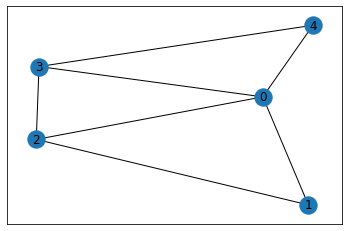

In [21]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import matplotlib

threshold = 0.09

%matplotlib inline
    
def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)
            if similarity_matrix[idx1][idx2] < threshold:
                similarity_matrix[idx1][idx2] = 0.
            
    return similarity_matrix


def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    print("Graph", sentence_similarity_martix)
    nx.draw_networkx(sentence_similarity_graph, with_labels=True)
    
    print("MIS result ", nx.maximal_independent_set(sentence_similarity_graph))
    
    
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

# let's begin
generate_summary( "qtext.txt", 2)

The tower is 324 metres (1,063 ft) tall
About the same height as an 81-storey building
It was the tallest structure in Paris
Its base is square, measuring 125 metres (410 ft) on each side
It was the first structure to reach a height of 300 metres
Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.
Graph [[0.         0.         0.         0.28867513 0.16666667]
 [0.         0.         0.         0.         0.23570226]
 [0.         0.         0.         0.         0.23570226]
 [0.28867513 0.         0.         0.         0.14433757]
 [0.16666667 0.23570226 0.23570226 0.14433757 0.        ]]
MIS result  [1, 0, 2]
Indexes of top ranked_sentence order are  [(0.35549616273111606, ['It', 'was', 'the', 'first', 'structure', 'to', 'reach', 'a', 'height', 'of', '300', 'metres']), (0.2057998481372572, ['The', 'tower', 'is', '324', 'metres', '(1,063', 'ft)', 'tall']), (0.19664518841717618, ['Its', 'base', 'is', 'square,', 'meas

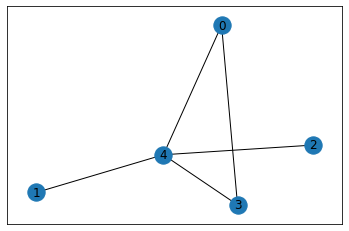

In [22]:
generate_summary( "tower.txt", 2)